In [1]:
%matplotlib inline

import pathlib
import imageio
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Glob the training data and load a single image path
training_paths = pathlib.Path('1 - Image/Dataset').glob('*')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[0]
im = imageio.imread(str(im_path))

In [2]:
# Print the image dimensions
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
from skimage.color import rgb2gray
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

Original image shape: (1575, 2100, 3)
New image shape: (1575, 2100)


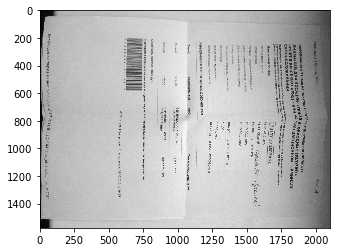

In [3]:
imgplot = plt.imshow(im_gray, cmap=plt.cm.gray)

In [23]:


        
def binarizeImage(image, sz, coef):
    d = image.shape[0] // (int)(sz)
    
    d_h = d // 2
    
    s = np.pad(image, d_h, mode = 'constant')
    
    for i in (range(d_h, image.shape[0])):
        for j in range(d_h, image.shape[1]):
            s[i, j] = s[i, j] + (s[i - 1, j] + s[i, j - 1] - s[i - 1, j - 1])
    
    
    padded_im = np.pad(image, ((d_h, d_h), (d_h, d_h)), mode = 'constant')
    
    def thresholding(i, j, x):
        im = (s[i, j] 
             + s[i + 2 * (d_h), j + 2 * (d_h)]
             - s[i + 2 * (d_h), j]
             - s[i, j + 2 * (d_h)]) / ((d_h * 2) ** 2)
        
        #print(im, x)
        t = im * coef
        threshold = im + t
        if (x >= threshold):
            return 1
        else:
            return 0
    
    
    out_image = image[:]  
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out_image[i, j] = thresholding(i, j, image[i, j])
 
        
        
    return out_image
            
    
    

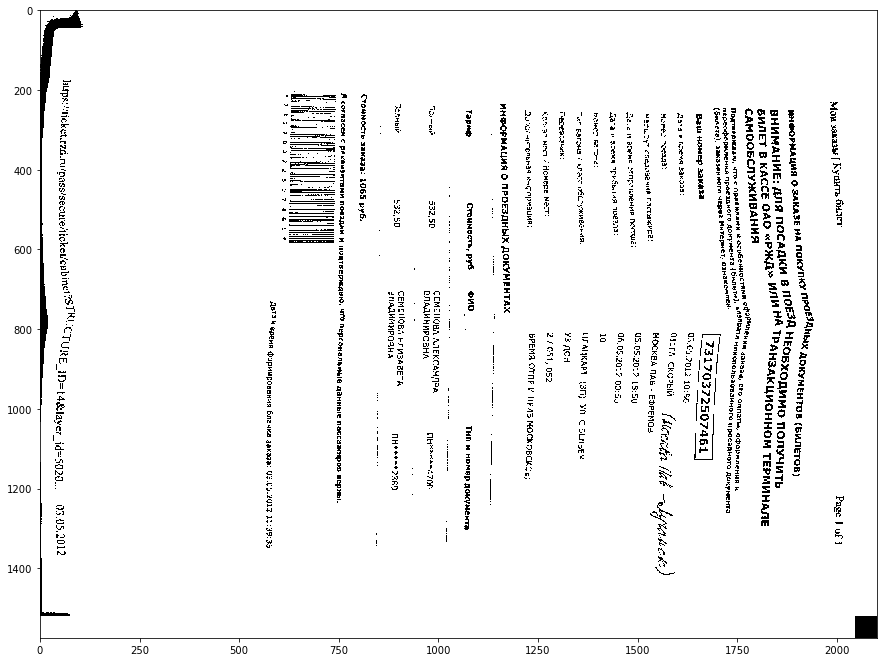

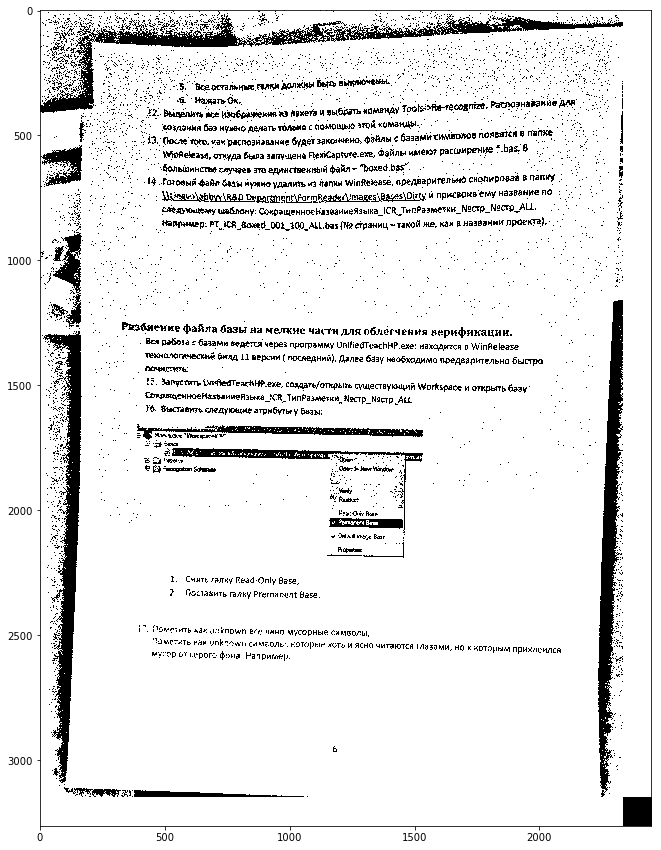

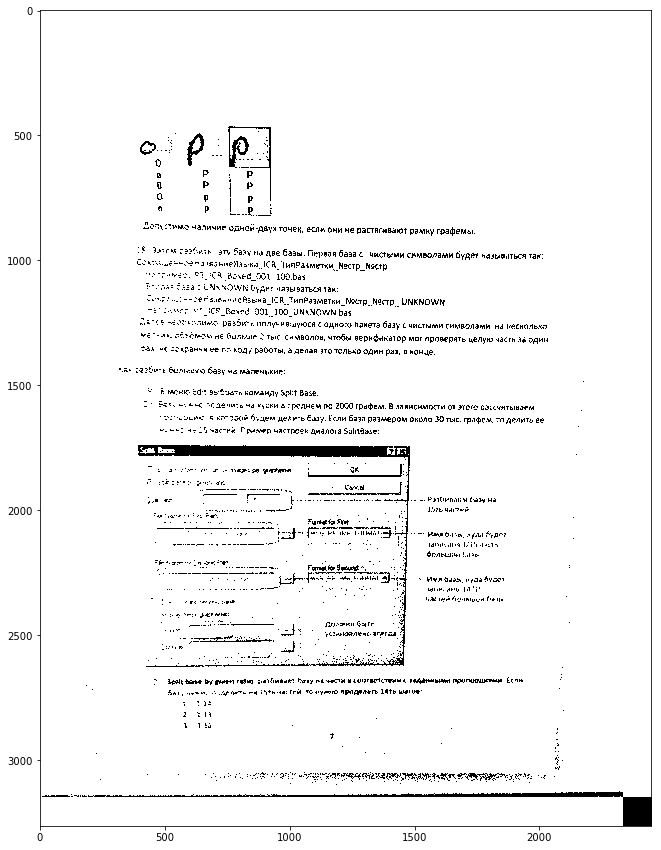

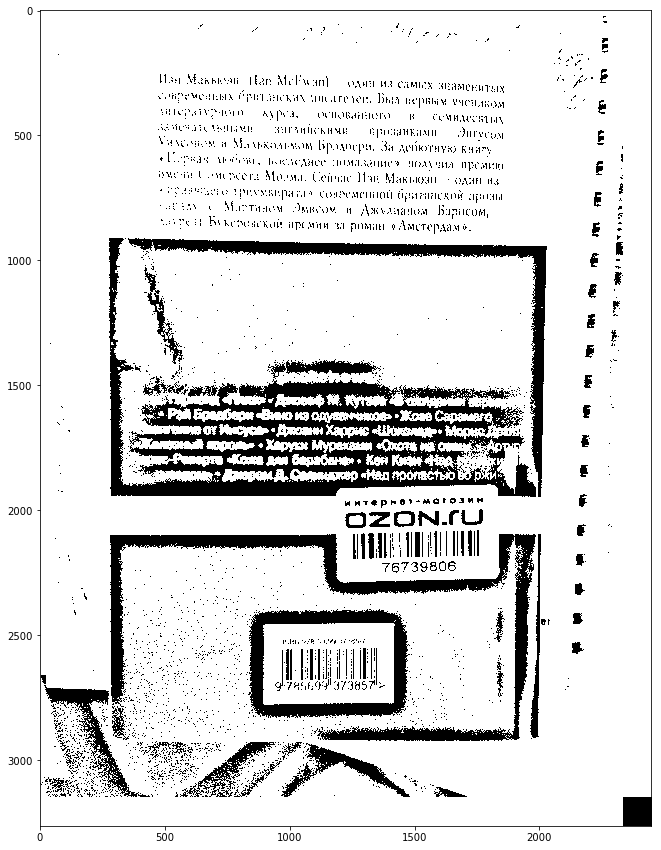

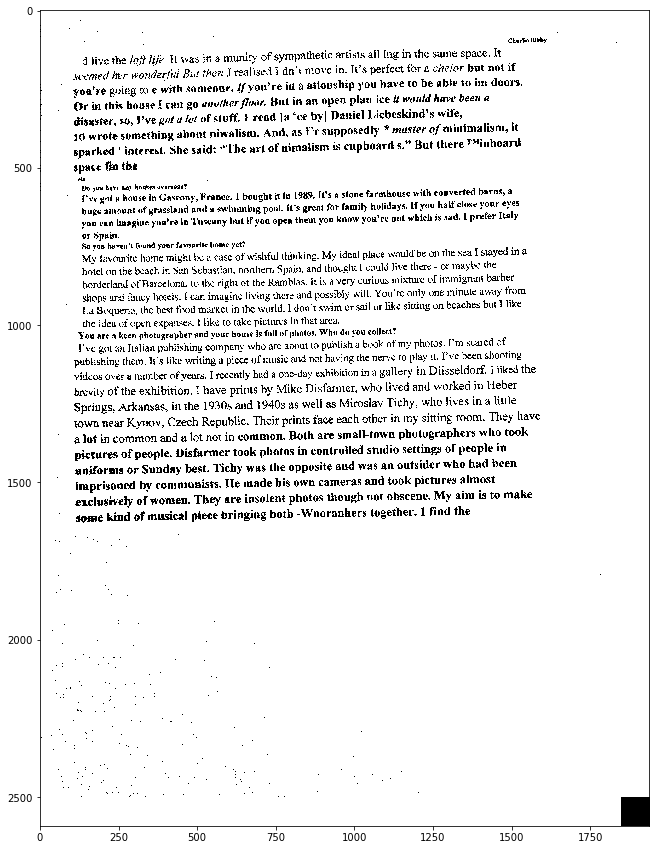

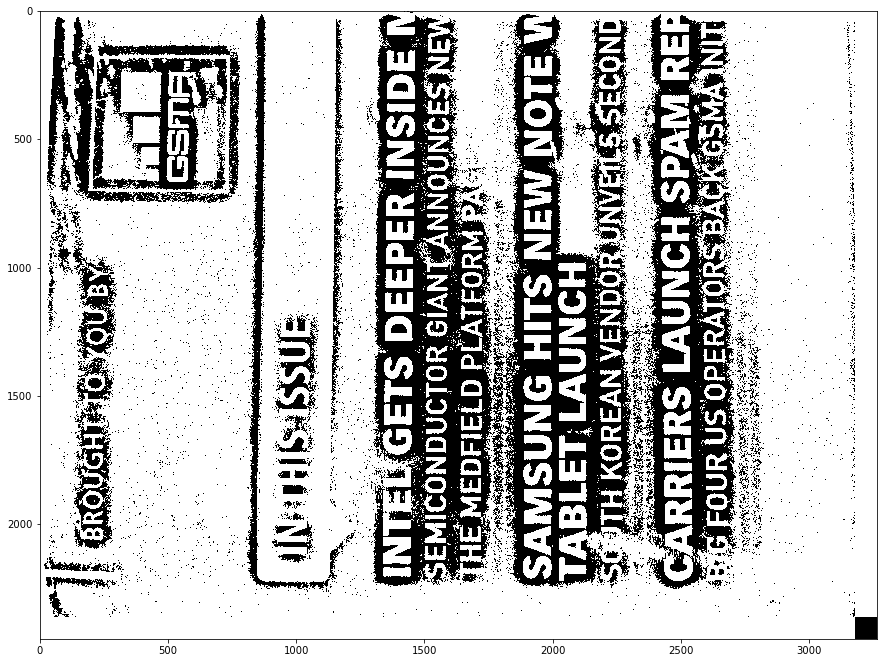

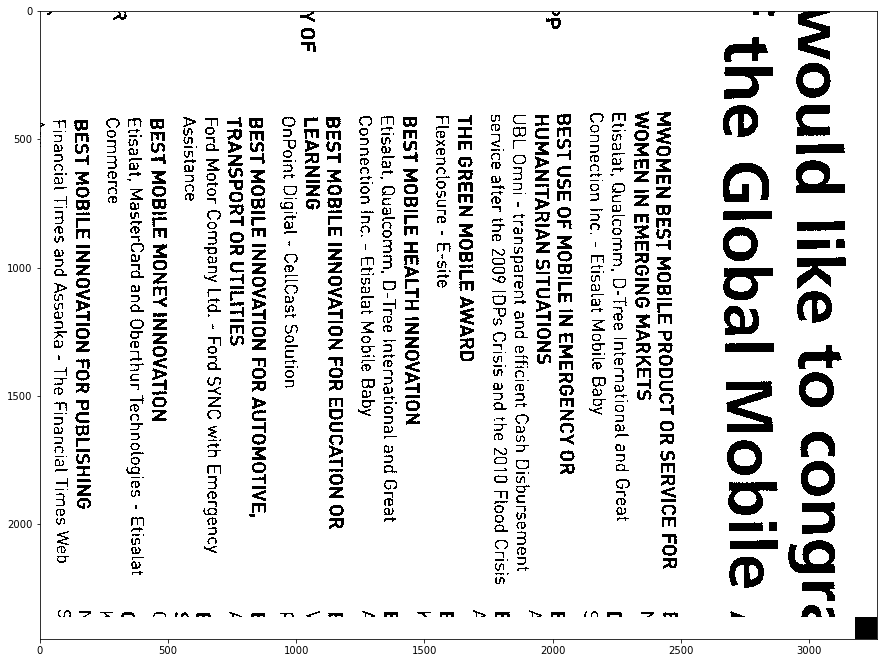

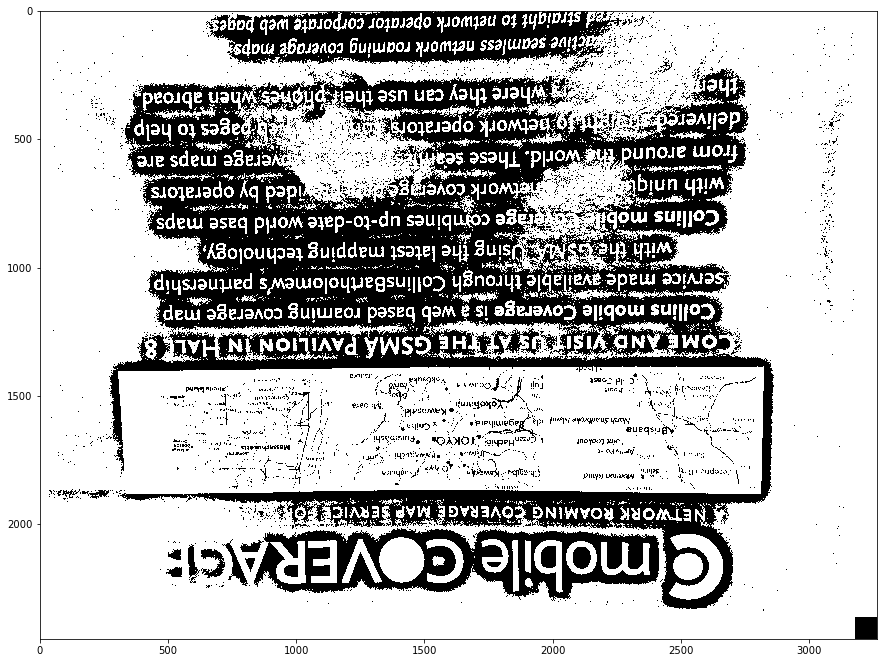

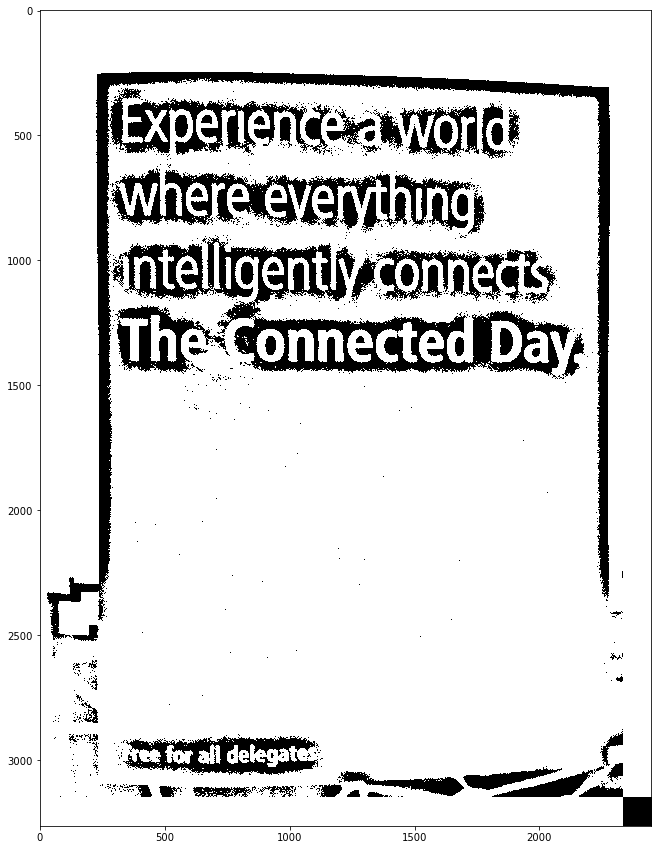

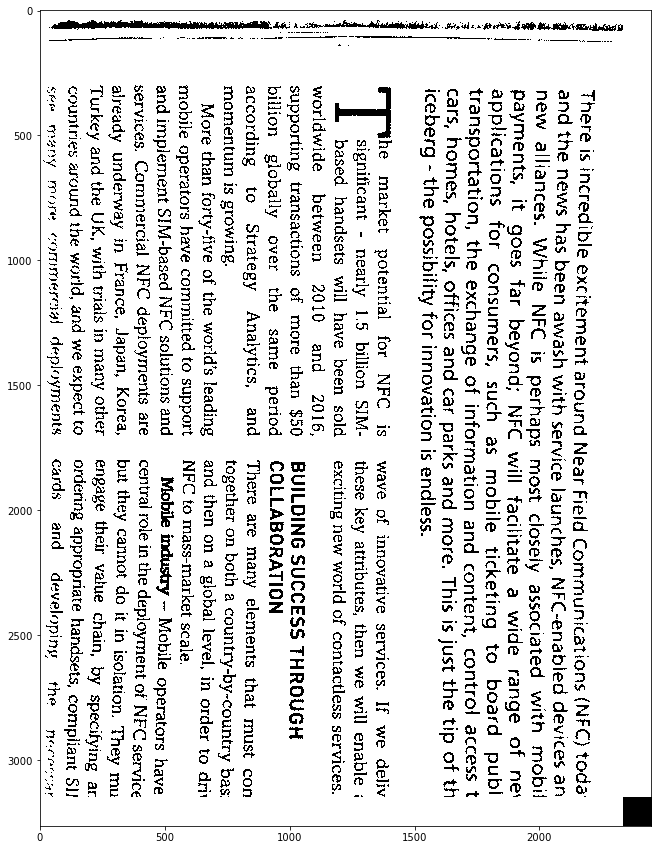

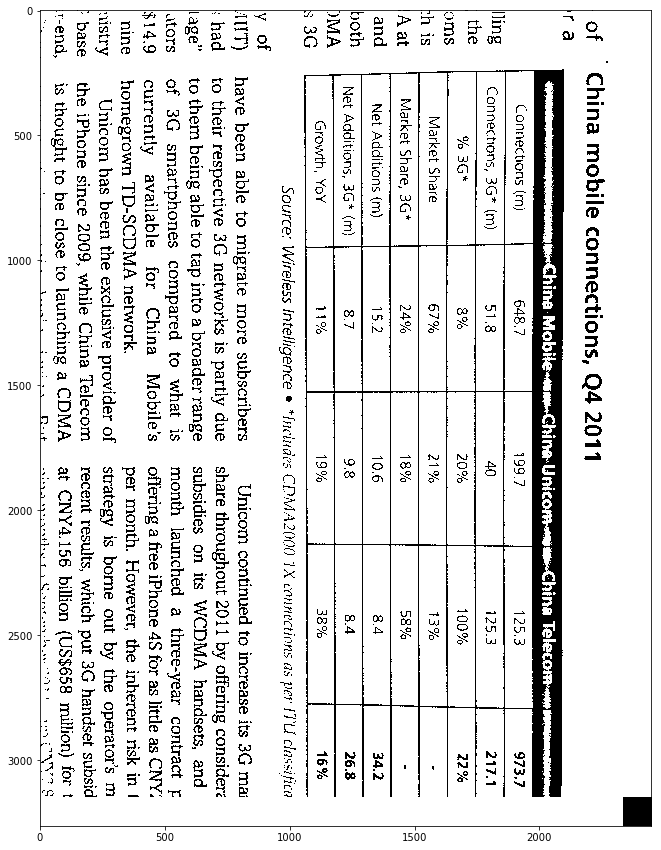

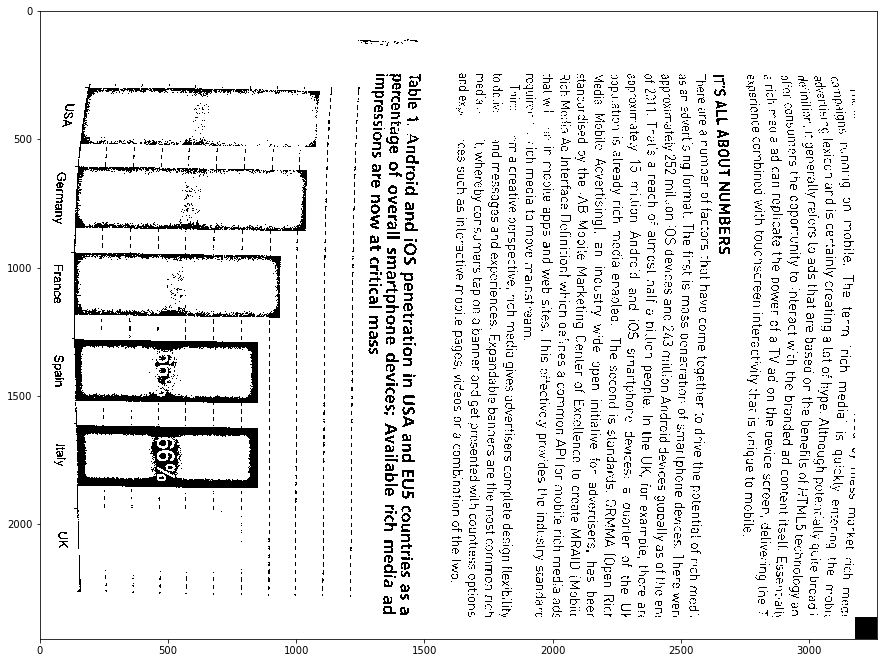

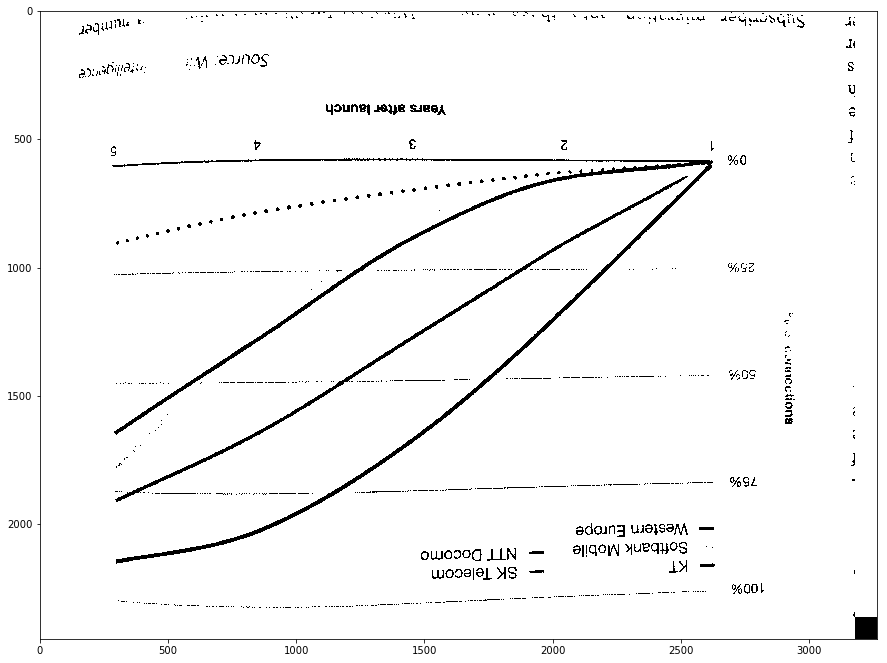

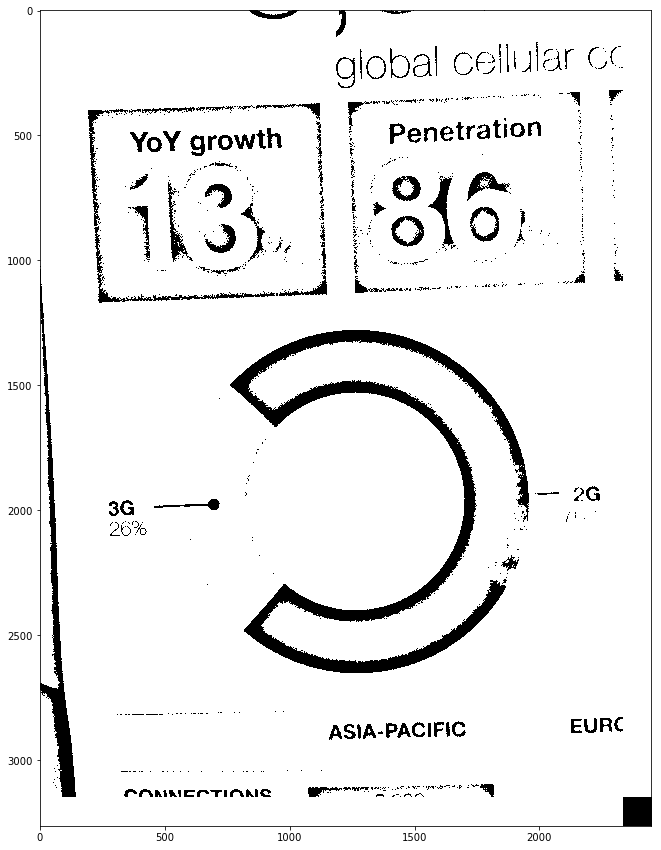

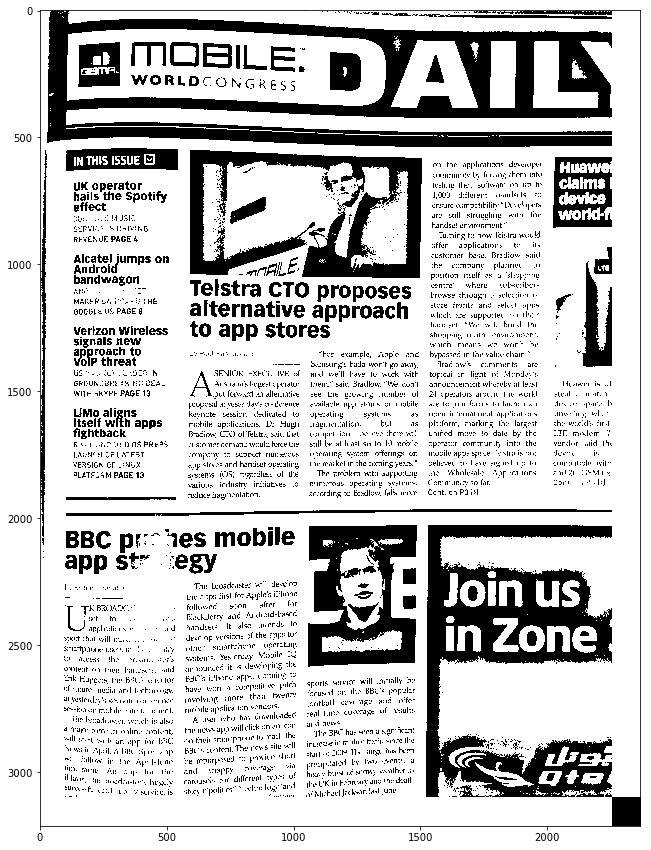

In [26]:
tqdm.pandas()

for (i, path) in enumerate(training_sorted):
    image = imageio.imread(str(path))
    plt.figure(figsize=(15, 15))
    binary_image = binarizeImage(rgb2gray(image), 28.5, -0.1999).astype(np.uint8)
    plt.imshow(rgb2gray(image), cmap=plt.cm.gray)
    plt.imshow(binary_image, cmap=plt.cm.gray)
    plt.imsave('res_images/image' + str(i) + '.png', binary_image, cmap=plt.cm.gray)
    #break
    
    